Multiple linear regression is an extension of simple linear regression, where multiple independent variables are used to predict the dependent variable. Scikit-learn, a machine learning library in Python, can be used to implement multiple linear regression models and to read, preprocess, and split data.

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
# Function to load ring datasets
def preprocess_bank_dataset(df):
    # Convert categorical columns to dummy variables
    df_processed = pd.get_dummies(df, drop_first=True)

    # Separating features and target variable
    X = df_processed.drop('y_yes', axis=1)
    y = df_processed['y_yes']
    return X, y

In [3]:
# Function to load ring datasets
def load_ring_dataset(filename):
    df = pd.read_csv(filename, sep="\t", header=None)
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values
    return X, y

In [4]:
# Function to perform MLR and evaluate
def perform_mlr(X_train, y_train, X_test, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")

In [5]:
# Loading ring datasets
X_separable, y_separable = load_ring_dataset('A2-ring-separable.txt')
X_merged, y_merged = load_ring_dataset('A2-ring-merged.txt')
X_test_ring, y_test_ring = load_ring_dataset('A2-ring-test.txt')

In [6]:
# Applying MLR on ring-separable dataset
print("MLR for Ring Separable Dataset:")
perform_mlr(X_separable, y_separable, X_test_ring, y_test_ring)

MLR for Ring Separable Dataset:
Mean Squared Error: 0.2491377826946656


In [7]:
# Applying MLR on ring-merged dataset
print("MLR for Ring Merged Dataset:")
perform_mlr(X_merged, y_merged, X_test_ring, y_test_ring)

MLR for Ring Merged Dataset:
Mean Squared Error: 0.24935354572562615


In [8]:
from sklearn.metrics import classification_report

In [9]:
def perform_mlr(X_train, y_train, X_test, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions for training and test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Converting predictions to binary classes
    # Assuming 0.5 as threshold for classification
    y_pred_train_class = [1 if x > 0.5 else 0 for x in y_pred_train]
    y_pred_test_class = [1 if x > 0.5 else 0 for x in y_pred_test]

    # Classification reports
    print("Classification Report (Train):")
    print(classification_report(y_train, y_pred_train_class))

    print("Classification Report (Test):")
    print(classification_report(y_test, y_pred_test_class))

    # Mean Squared Error for regression
    mse = mean_squared_error(y_test, y_pred_test)
    print(f"Mean Squared Error: {mse}")

In [10]:
# Applying MLR on ring-separable dataset
print("MLR for Ring Separable Dataset:")
perform_mlr(X_separable, y_separable, X_test_ring, y_test_ring)

# Applying MLR on ring-merged dataset
print("MLR for Ring Merged Dataset:")
perform_mlr(X_merged, y_merged, X_test_ring, y_test_ring)

MLR for Ring Separable Dataset:
Classification Report (Train):
              precision    recall  f1-score   support

           0       0.52      0.99      0.68      5203
           1       0.00      0.00      0.00      4797

    accuracy                           0.52     10000
   macro avg       0.26      0.50      0.34     10000
weighted avg       0.27      0.52      0.35     10000

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.53      0.99      0.69      5333
           1       0.00      0.00      0.00      4667

    accuracy                           0.53     10000
   macro avg       0.27      0.50      0.35     10000
weighted avg       0.28      0.53      0.37     10000

Mean Squared Error: 0.2491377826946656
MLR for Ring Merged Dataset:
Classification Report (Train):
              precision    recall  f1-score   support

           0       0.55      1.00      0.71      5515
           1       0.00      0.00      0.00  

In [11]:
# Applying MLR on ring-separable dataset
print("MLR for Ring Separable Dataset:")
perform_mlr(X_separable, y_separable, X_test_ring, y_test_ring)

# Applying MLR on ring-merged dataset
print("MLR for Ring Merged Dataset:")
perform_mlr(X_merged, y_merged, X_test_ring, y_test_ring)

MLR for Ring Separable Dataset:
Classification Report (Train):
              precision    recall  f1-score   support

           0       0.52      0.99      0.68      5203
           1       0.00      0.00      0.00      4797

    accuracy                           0.52     10000
   macro avg       0.26      0.50      0.34     10000
weighted avg       0.27      0.52      0.35     10000

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.53      0.99      0.69      5333
           1       0.00      0.00      0.00      4667

    accuracy                           0.53     10000
   macro avg       0.27      0.50      0.35     10000
weighted avg       0.28      0.53      0.37     10000

Mean Squared Error: 0.2491377826946656
MLR for Ring Merged Dataset:
Classification Report (Train):
              precision    recall  f1-score   support

           0       0.55      1.00      0.71      5515
           1       0.00      0.00      0.00  

In [12]:
df_additional = pd.read_csv('bank-additional.csv', sep=';')
df_full = pd.read_csv('bank-additional-full.csv', sep=';')

In [13]:
# Preprocessing the bank datasets
X_additional, y_additional = preprocess_bank_dataset(df_additional)
X_full, y_full = preprocess_bank_dataset(df_full)

In [14]:
# Using 70% for training and 30% for testing
X_train_additional, X_test_additional, y_train_additional, y_test_additional = train_test_split(
    X_additional, y_additional, test_size=0.3, random_state=42)

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full, y_full, test_size=0.3, random_state=42)

In [15]:
# Applying MLR on the bank additional dataset
print("MLR for Bank Additional Dataset:")
perform_mlr(X_train_additional, y_train_additional, X_test_additional, y_test_additional)

# Applying MLR on the bank additional full dataset
print("\nMLR for Bank Additional Full Dataset:")
perform_mlr(X_train_full, y_train_full, X_test_full, y_test_full)

MLR for Bank Additional Dataset:
Classification Report (Train):
              precision    recall  f1-score   support

           0       0.93      0.99      0.95      2563
           1       0.75      0.36      0.49       320

    accuracy                           0.92      2883
   macro avg       0.84      0.67      0.72      2883
weighted avg       0.91      0.92      0.90      2883

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1105
           1       0.67      0.34      0.45       131

    accuracy                           0.91      1236
   macro avg       0.80      0.66      0.70      1236
weighted avg       0.90      0.91      0.90      1236

Mean Squared Error: 0.06365664892343602

MLR for Bank Additional Full Dataset:
Classification Report (Train):
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     25580
           1       0.69      0.32

In [16]:
# Load the dataset
file_path = 'UniversalBank.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Preprocess the dataset
# Assuming the last column is the target and the rest are features
X = df.iloc[:, :-1]  # All columns except the last one
y = df.iloc[:, -1]   # The last column

# If the dataset contains categorical features, use OneHotEncoder
# Identify categorical columns (modify this list based on your dataset)
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Create a preprocessing and modeling pipeline
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(), categorical_features),
    ('scaler', StandardScaler(), numerical_features)
], remainder='passthrough')

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))  # Increase the number of iterations
])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fitting the model and making predictions
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Generating the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.98      0.85      1073
           1       0.79      0.17      0.27       427

    accuracy                           0.75      1500
   macro avg       0.77      0.57      0.56      1500
weighted avg       0.76      0.75      0.69      1500



In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Identifying categorical and numerical features
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(), categorical_features),
    ('scaler', StandardScaler(), numerical_features)
], remainder='passthrough')

# MLR model pipeline
mlr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs'))
])

# Parameter grid for MLR
param_grid = {
    'classifier__C': [0.1, 1, 10, 100]
}

# Grid search with cross-validation
grid_search = GridSearchCV(mlr_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

# Report best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters for MLR:", best_params)
print("Best Cross-Validation Score for MLR:", best_score)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Evaluate on the test set using the best model
best_mlr = grid_search.best_estimator_
y_pred = best_mlr.predict(X_test)
print("Classification Report for UniversalBank Dataset (Best MLR on Test Set):")
print(classification_report(y_test, y_pred))

Best Parameters for MLR: {'classifier__C': 0.1}
Best Cross-Validation Score for MLR: 0.742
Classification Report for UniversalBank Dataset (Best MLR on Test Set):
              precision    recall  f1-score   support

           0       0.75      0.98      0.85      1073
           1       0.79      0.17      0.27       427

    accuracy                           0.75      1500
   macro avg       0.77      0.57      0.56      1500
weighted avg       0.76      0.75      0.69      1500



In [18]:
from sklearn.metrics import mean_squared_error, classification_report, accuracy_score, recall_score, precision_score, f1_score
def perform_mlr(X_train, y_train, X_test, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_test_class = [1 if x > 0.5 else 0 for x in y_pred_test]

    mse = mean_squared_error(y_test, y_pred_test)
    accuracy = accuracy_score(y_test, y_pred_test_class)
    recall = recall_score(y_test, y_pred_test_class)
    precision = precision_score(y_test, y_pred_test_class)
    f1 = f1_score(y_test, y_pred_test_class)

    return mse, accuracy, recall, precision, f1

In [19]:
results = pd.DataFrame(columns=['Dataset', 'MSE', 'Accuracy', 'Recall', 'Precision', 'F1'])

metrics = perform_mlr(X_train_additional, y_train_additional, X_test_additional, y_test_additional)
results = results._append({'Dataset': 'Bank Additional', 'MSE': metrics[0], 'Accuracy': metrics[1], 'Recall': metrics[2], 'Precision': metrics[3], 'F1': metrics[4]}, ignore_index=True)

metrics = perform_mlr(X_train_full, y_train_full, X_test_full, y_test_full)
results = results._append({'Dataset': 'Bank Additional Full', 'MSE': metrics[0], 'Accuracy': metrics[1], 'Recall': metrics[2], 'Precision': metrics[3], 'F1': metrics[4]}, ignore_index=True)
print(results)

                Dataset       MSE  Accuracy    Recall  Precision        F1
0       Bank Additional  0.063657  0.911812  0.335878   0.666667  0.446701
1  Bank Additional Full  0.063295  0.907826  0.331893   0.686012  0.447356


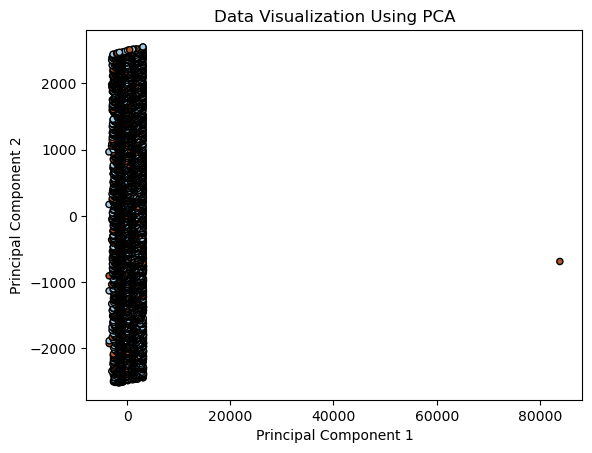

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.Paired, edgecolor='k', s=20)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data Visualization Using PCA')
plt.show()

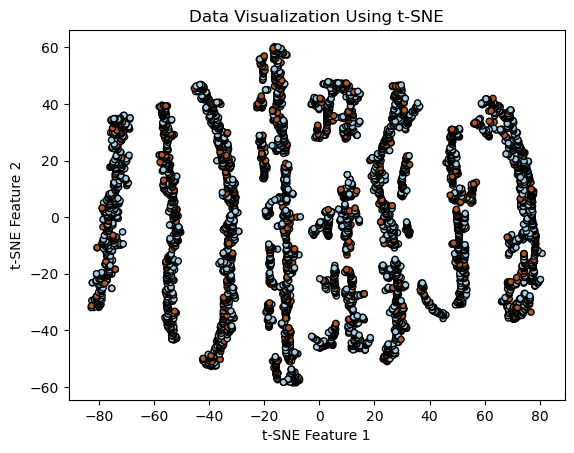

In [26]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=plt.cm.Paired, edgecolor='k', s=20)
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.title('Data Visualization Using t-SNE')
plt.show()